Задание 2. Анализ изменения поведения клиентов
Цель: Проанализировать влияние маркетинговой кампании на состав покупок, расширение товарной корзины, покупку новых товаров и выявить чувствительность клиентов до, во время и после кампании.
Данные:
 Person.csv – характеристики клиентов
 Goods.csv – каталог товаров с категориями
 List_Purchases.parquet – строки покупок
 List_Cheques.parquet – чеки
 Action.csv – история кампаний
 Доступ по ссылке: https://drive.google.com/file/d/1K-fxKIeFI8lVd0hZXuJKwzyoEat9GdZw/view?usp=sharing
Поля включают: Person_BKEY, Purchase_ID, Operation_datetime, баллы (toCard_*, fromCard_*), Amount_Cheque, Merchant_id, Goods_BKEY, Qnt, Amount, Amount_Origin
Этапы анализа:
1. Сегментация по периодам: до/во время/после акции
2. Создание признаков доли новых товаров и категорий в покупках до и во время акции
3. Сравнительный анализ: чеки, сумма, товарные доли и доли категорий каталога
4. Определение чувствительных клиентов: создание и выделение признаков и бинов с максимальным влиянием на изменение покупательского поведения в разрезе количества и состава товаров и категорий, покупки новых товаров и категорий
5. Визуализация: временные графики, диаграммы категорий
6. Выводы + бизнес-рекомендации


In [10]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
person = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Person.csv")
goods = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Goods.csv")
actions = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Actions.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
print(f"Размер датасета: {person.shape}")
print("\nИнформация о столбцах:")
print(person.info())
print("\nПропущенные значения:")
print(person.isnull().sum())
person.head()

Размер датасета: (500000, 4)

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Person_BKEY       500000 non-null  int64 
 1   First_Purch_date  500000 non-null  object
 2   Age               500000 non-null  int64 
 3   Gend              500000 non-null  object
dtypes: int64(2), object(2)
memory usage: 15.3+ MB
None

Пропущенные значения:
Person_BKEY         0
First_Purch_date    0
Age                 0
Gend                0
dtype: int64


,Person_BKEY,First_Purch_date,Age,Gend
0,162,2018-07-06 19:36:04,52,F
1,359,2017-07-14 16:27:35,60,M
2,600,2017-10-10 12:22:44,82,M
3,1042,2017-11-26 11:21:29,40,U
4,1080,2018-02-21 19:08:56,21,U


In [12]:
print(f"Размер датасета: {goods.shape}")
print("\nИнформация о столбцах:")
print(goods.info())
print("\nПропущенные значения:")
print(goods.isnull().sum())
goods.head()

Размер датасета: (43038, 11)

Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43038 entries, 0 to 43037
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Goods_BKEY       43038 non-null  int64  
 1   cat_lev_01_BKEY  43038 non-null  int64  
 2   cat_lev_02_BKEY  43038 non-null  int64  
 3   Cat_lev_03_BKEY  43038 non-null  int64  
 4   Cat_lev_04_BKEY  43038 non-null  int64  
 5   Attribut_01      41466 non-null  float64
 6   Brand_BKEY       43038 non-null  int64  
 7   Manufator_BKEY   43038 non-null  int64  
 8   Waight           43035 non-null  float64
 9   Self_Brand_flag  43038 non-null  int64  
 10  Alco_flag        43038 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 3.6 MB
None

Пропущенные значения:
Goods_BKEY            0
cat_lev_01_BKEY       0
cat_lev_02_BKEY       0
Cat_lev_03_BKEY       0
Cat_lev_04_BKEY       0
Attribut_01        1572
Brand_BKEY        

,Goods_BKEY,cat_lev_01_BKEY,cat_lev_02_BKEY,Cat_lev_03_BKEY,Cat_lev_04_BKEY,Attribut_01,Brand_BKEY,Manufator_BKEY,Waight,Self_Brand_flag,Alco_flag
0,5333,0,38,101,746,259.0,1683,2183,0.30,0,0
1,3875,0,38,101,746,259.0,1683,2183,0.70,0,0
2,3726,0,38,101,746,259.0,1683,2183,0.36,0,0
3,14038,0,38,101,746,259.0,1253,2183,0.60,0,0
4,12502,0,38,101,746,259.0,3284,1570,0.80,0,0


In [13]:
goods = goods.drop('Waight', axis=1) # неважно для анализа
goods = goods.drop('Attribut_01', axis=1) # много пропусков
goods.head()

,Goods_BKEY,cat_lev_01_BKEY,cat_lev_02_BKEY,Cat_lev_03_BKEY,Cat_lev_04_BKEY,Brand_BKEY,Manufator_BKEY,Self_Brand_flag,Alco_flag
0,5333,0,38,101,746,1683,2183,0,0
1,3875,0,38,101,746,1683,2183,0,0
2,3726,0,38,101,746,1683,2183,0,0
3,14038,0,38,101,746,1253,2183,0,0
4,12502,0,38,101,746,3284,1570,0,0


In [14]:
actions = actions.drop('Action_date', axis=1) #одно и то же значение
actions.head()

,Person_BKEY,In_Action,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card
0,162,0,195.00,1,0.0
1,359,1,1298.93,3,300.0
2,600,1,1224.17,1,-0.0
3,1042,1,313.18,2,300.0
4,1080,1,0.00,0,-0.0


In [15]:
actions = actions.sort_values('Person_BKEY').reset_index(drop=True)
actions['action_flag'] = 0
condition = (actions['In_Action'] == 1) & (actions['Sum_Purch_in_Action'] > 0) & (actions['Qnt_Purch_in_Action'] > 0)
actions.loc[condition, 'action_flag'] = 1
print("Распределение флагов:")
print(actions['action_flag'].value_counts())
actions = actions.drop('In_Action', axis=1)
actions.head()

Распределение флагов:
action_flag
0    339743
1    160257
Name: count, dtype: int64


,Person_BKEY,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,action_flag
0,0,909.0,1,0.0,0
1,1,791.0,2,-0.0,1
2,2,0.0,0,0.0,0
3,3,654.0,1,-0.0,1
4,4,0.0,0,-0.0,0


In [16]:
person_actions = actions.merge(person,on='Person_BKEY',how='left')
person_actions.head()

,Person_BKEY,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,action_flag,First_Purch_date,Age,Gend
0,0,909.0,1,0.0,0,2017-08-05 15:40:48,45,U
1,1,791.0,2,-0.0,1,2017-04-10 13:54:23,72,F
2,2,0.0,0,0.0,0,2018-12-15 13:33:11,68,F
3,3,654.0,1,-0.0,1,2018-01-06 10:24:33,48,U
4,4,0.0,0,-0.0,0,2017-05-23 12:56:14,60,F


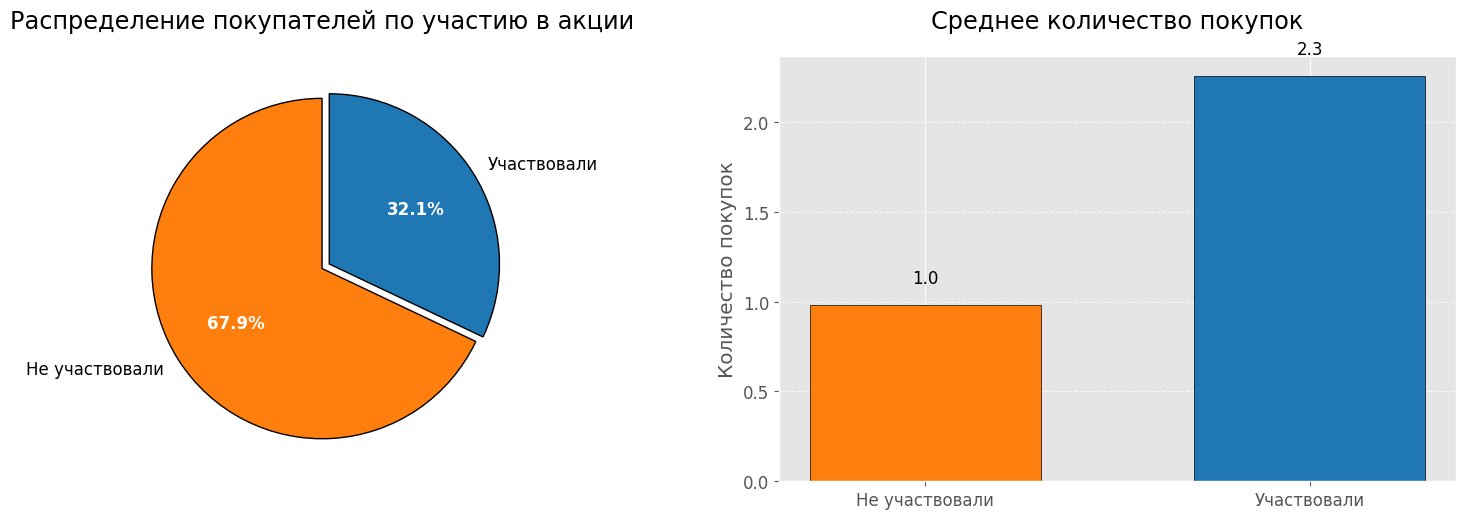

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
participation = person_actions['action_flag'].value_counts()
colors = ['#ff7f0e', '#1f77b4']
explode = (0, 0.05)
wedges, texts, autotexts = ax1.pie(
    participation,
    labels=['Не участвовали', 'Участвовали'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax1.set_title('Распределение покупателей по участию в акции', pad=20)
purchase_stats = person_actions.groupby('action_flag')['Qnt_Purch_in_Action'].mean()
x = np.arange(len(purchase_stats))
width = 0.6

bars = ax2.bar(
    x,
    purchase_stats.values,
    width,
    color=colors,
    edgecolor='black'
)
ax2.set_title('Среднее количество покупок', pad=20)
ax2.set_ylabel('Количество покупок')
ax2.set_xticks(x)
ax2.set_xticklabels(['Не участвовали', 'Участвовали'])
ax2.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.1,
        f'{height:.1f}',
        ha='center',
        va='bottom'
    )
plt.tight_layout(pad=3.0)
plt.show()

Распределение  покупателей по возрастным группам:
Age_Group
<18        6729
18-25     40679
26-35     99996
36-45    104201
46-55     84800
56-65     96234
65+       66967
Name: count, dtype: int64

Доля каждой возрастной группы (%):
Age_Group
<18       1.3
18-25     8.1
26-35    20.0
36-45    20.9
46-55    17.0
56-65    19.3
65+      13.4
Name: proportion, dtype: float64


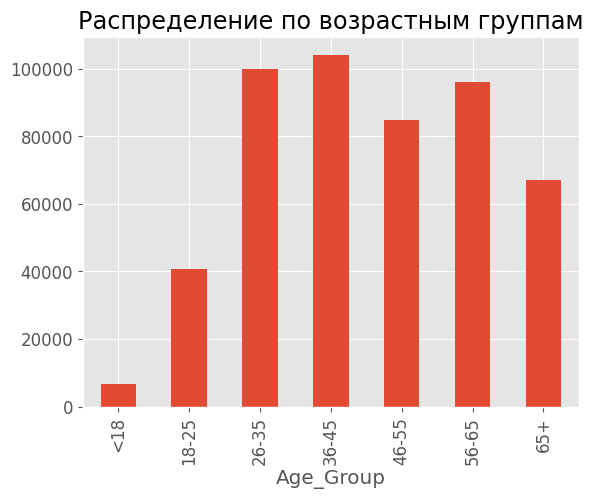


Распределение покупателей по полу:
Gend
U    232002
F    184640
M     83358
Name: count, dtype: int64

Доля каждого пола (%):
Gend
U    46.4
F    36.9
M    16.7
Name: proportion, dtype: float64


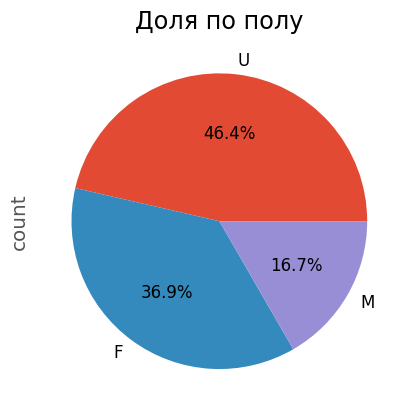

In [18]:
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
bins = [0, 18, 26, 36, 46, 56, 66, 120]
person_actions['Age_Group'] = pd.cut(
    person_actions['Age'],
    bins=bins,
    labels=labels,
    right=False
)
age_distribution = person_actions['Age_Group'].value_counts().sort_index()
print("Распределение  покупателей по возрастным группам:")
print(age_distribution)
age_distribution_pct = person_actions['Age_Group'].value_counts(normalize=True).sort_index() * 100
print("\nДоля каждой возрастной группы (%):")
print(age_distribution_pct.round(1))
import matplotlib.pyplot as plt
age_distribution.plot(kind='bar', title='Распределение по возрастным группам')
plt.show()

gender_distribution = person_actions['Gend'].value_counts()
print("\nРаспределение покупателей по полу:")
print(gender_distribution)
gender_distribution_pct = person_actions['Gend'].value_counts(normalize=True) * 100
print("\nДоля каждого пола (%):")
print(gender_distribution_pct.round(1))

gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Доля по полу')
plt.show()

In [19]:
participants_df = person_actions[person_actions['action_flag'] == 1].groupby('Person_BKEY').agg(
    Sum_Purch_in_Action=('Sum_Purch_in_Action', 'sum'),
    Qnt_Purch_in_Action=('Qnt_Purch_in_Action', 'sum')
).reset_index()
participants_df.head() # список уникальных покупателей, участников акций

,Person_BKEY,Sum_Purch_in_Action,Qnt_Purch_in_Action
0,1,791.00,2
1,3,654.00,1
2,5,374.76,1
3,8,784.67,3
4,9,1455.48,4


In [20]:
participants_df.to_csv('/content/drive/My Drive/Colab Notebooks/data/participants_df.csv', index=False)

In [21]:
import pyarrow.parquet as pq
import pandas as pd
cheques = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/data/List_Cheques.parquet')
print(f"Всего строк: {len(cheques)}")
print("\nNULL-значения по колонкам:")
print(cheques.isnull().sum())
cheques = cheques.rename(columns={'Opetation_datetime': 'Operation_datetime'})# исправляем опечатку
cheques['Operation_datetime'] = pd.to_datetime(cheques['Operation_datetime'])
cheques.head()

Всего строк: 10065266

NULL-значения по колонкам:
Person_BKEY           0
Purchase_ID           0
Amount_Original       0
Amount                0
toCard_stand          0
toCard_short          0
fromCard_stand        0
fromCard_short        0
Amount_Cheque         0
Merchant_id           0
Opetation_datetime    0
dtype: int64


,Person_BKEY,Purchase_ID,Amount_Original,Amount,toCard_stand,toCard_short,fromCard_stand,fromCard_short,Amount_Cheque,Merchant_id,Operation_datetime
0,0,4169120,0.0,804.0,8.0,0.0,0.0,0.0,803.0,81,2019-03-08 10:12:03
1,0,4962998,0.0,1007.0,10.0,0.0,0.0,0.0,1007.0,4557,2018-12-01 07:12:45
2,0,7048393,0.0,419.0,2.0,0.0,0.0,0.0,419.0,81,2019-03-14 15:01:47
3,0,7618050,0.0,575.0,5.7,0.0,0.0,0.0,574.0,12891,2018-12-16 08:56:01
4,1,402585,0.0,700.0,7.0,0.0,0.0,0.0,700.0,3166,2018-12-21 11:08:58


In [22]:
cheques = cheques[['Person_BKEY','Purchase_ID', 'Amount_Cheque']]
cheques.head()

,Person_BKEY,Purchase_ID,Amount_Cheque
0,0,4169120,803.0
1,0,4962998,1007.0
2,0,7048393,419.0
3,0,7618050,574.0
4,1,402585,700.0


In [28]:
# большой массив, посмотрим структуру без загрузки
import pyarrow.parquet as pq
import pyarrow as pa
parquet_file = pq.ParquetFile('/content/drive/MyDrive/Colab Notebooks/data/List_Purchases.parquet')
total_rows = parquet_file.metadata.num_rows
print(f"Всего строк: {total_rows}")
null_counts = {}
for i in range(parquet_file.metadata.num_row_groups):
    row_group = parquet_file.metadata.row_group(i)
    for j in range(row_group.num_columns):
        col = row_group.column(j)
        column_name = col.path_in_schema
        null_count = col.statistics.null_count if col.statistics is not None else None

        if column_name not in null_counts:
            null_counts[column_name] = 0

        if null_count is not None:
            null_counts[column_name] += null_count

print("Количество NULL-значений:")
for col, null_count in null_counts.items():
    print(f"{col}: {null_count}")

purchases = pq.read_table('/content/drive/MyDrive/Colab Notebooks/data/List_Purchases.parquet').slice(0, 2).to_pandas()
purchases

Всего строк: 57149006
Количество NULL-значений:
Person_BKEY: 0
Purchase_ID: 0
Opetation_datetime: 0
toCard_stand: 0
toCard_short: 0
fromCard_stand: 0
fromCard_short: 0
Amount_Cheque: 0
Merchant_id: 0
Goods_BKEY: 0
Qnt: 0
Amount: 0
Amount_Original: 53359663
__index_level_0__: 0


,Person_BKEY,Purchase_ID,Opetation_datetime,toCard_stand,toCard_short,fromCard_stand,fromCard_short,Amount_Cheque,Merchant_id,Goods_BKEY,Qnt,Amount,Amount_Original
0,162,5681805,2018-12-26 11:35:21,2.1,0.0,0.0,0.0,434.97,560,30531,1.0,77.0,NaN
1,162,2655010,2018-12-24 15:50:50,0.8,0.0,0.0,0.0,167.00,560,668,1.0,70.0,NaN


In [29]:
import pandas as pd
columns_to_read = ['Person_BKEY','Purchase_ID','Opetation_datetime','Amount', 'Goods_BKEY','Qnt', 'Merchant_id']
purchases= pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/data/List_Purchases.parquet', columns=columns_to_read)
purchases.rename(columns={'Opetation_datetime':'Operation_datetime'}, inplace =True) #исправляем опечатку
purchases.head()

,Person_BKEY,Purchase_ID,Operation_datetime,Amount,Goods_BKEY,Qnt,Merchant_id
0,162,5681805,2018-12-26 11:35:21,77.0,30531,1.0,560
1,162,2655010,2018-12-24 15:50:50,70.0,668,1.0,560
2,162,5681805,2018-12-26 11:35:21,28.0,15558,1.0,560
3,162,2655010,2018-12-24 15:50:50,57.0,24637,1.0,560
4,162,5681805,2018-12-26 11:35:21,162.0,31933,2.0,560


In [30]:
# Объединение покупок и чеков
df = purchases.merge(cheques, on=['Person_BKEY','Purchase_ID'], how='left')

In [31]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57149006 entries, 0 to 57149005
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Person_BKEY         int64         
 1   Purchase_ID         int64         
 2   Operation_datetime  datetime64[us]
 3   Amount              float64       
 4   Goods_BKEY          int64         
 5   Qnt                 float64       
 6   Merchant_id         int64         
 7   Amount_Cheque       float64       
dtypes: datetime64[us](1), float64(3), int64(4)
memory usage: 3.4 GB
None


,Person_BKEY,Purchase_ID,Operation_datetime,Amount,Goods_BKEY,Qnt,Merchant_id,Amount_Cheque
0,162,5681805,2018-12-26 11:35:21,77.0,30531,1.0,560,434.97
1,162,2655010,2018-12-24 15:50:50,70.0,668,1.0,560,167.00
2,162,5681805,2018-12-26 11:35:21,28.0,15558,1.0,560,434.97
3,162,2655010,2018-12-24 15:50:50,57.0,24637,1.0,560,167.00
4,162,5681805,2018-12-26 11:35:21,162.0,31933,2.0,560,434.97


In [ ]:
# Добавление информации о товарах
df = df.merge(goods, on='Goods_BKEY', how='left')

In [ ]:
# Добавление данных о клиентах
df = df.merge(person_actions, on='Person_BKEY', how='left')

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57149006 entries, 0 to 57149005
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Person_BKEY          int64         
 1   Purchase_ID          int64         
 2   Operation_datetime   datetime64[us]
 3   Amount               float64       
 4   Goods_BKEY           int64         
 5   Qnt                  float64       
 6   Merchant_id          int64         
 7   Amount_Cheque        float64       
 8   cat_lev_01_BKEY      int64         
 9   cat_lev_02_BKEY      int64         
 10  Cat_lev_03_BKEY      int64         
 11  Cat_lev_04_BKEY      int64         
 12  Brand_BKEY           int64         
 13  Manufator_BKEY       int64         
 14  Self_Brand_flag      int64         
 15  Alco_flag            int64         
 16  Sum_Purch_in_Action  float64       
 17  Qnt_Purch_in_Action  int64         
 18  Sum_from_Card        float64       
 19  action_flag        

,Person_BKEY,Purchase_ID,Operation_datetime,Amount,Goods_BKEY,Qnt,Merchant_id,Amount_Cheque,cat_lev_01_BKEY,cat_lev_02_BKEY,...,Self_Brand_flag,Alco_flag,Sum_Purch_in_Action,Qnt_Purch_in_Action,Sum_from_Card,action_flag,First_Purch_date,Age,Gend,Age_Group
0,162,5681805,2018-12-26 11:35:21,77.0,30531,1.0,560,434.97,1,16,...,0,0,195.0,1,0.0,0,2018-07-06 19:36:04,52,F,46-55
1,162,2655010,2018-12-24 15:50:50,70.0,668,1.0,560,167.00,1,1,...,0,0,195.0,1,0.0,0,2018-07-06 19:36:04,52,F,46-55
2,162,5681805,2018-12-26 11:35:21,28.0,15558,1.0,560,434.97,0,0,...,0,0,195.0,1,0.0,0,2018-07-06 19:36:04,52,F,46-55
3,162,2655010,2018-12-24 15:50:50,57.0,24637,1.0,560,167.00,1,1,...,0,0,195.0,1,0.0,0,2018-07-06 19:36:04,52,F,46-55
4,162,5681805,2018-12-26 11:35:21,162.0,31933,2.0,560,434.97,0,0,...,0,0,195.0,1,0.0,0,2018-07-06 19:36:04,52,F,46-55


In [ ]:
df = df.drop('Age_Group', axis=1)
df.head()

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Предположим, df уже загружен как указано в вопросе

### 1. Сегментация по периодам: до/во время/после акции
# Создаем новый флаг акции (если In_Action=1 и Sum_Purch_in_Action>0)
df['action_flag'] = np.where((df['In_Action'] == 1) & (df['Sum_Purch_in_Action'] > 0), 1, 0)

# Определяем даты начала и окончания акции
action_start = df[df['action_flag'] == 1]['Operation_datetime'].min()
action_end = df[df['action_flag'] == 1]['Operation_datetime'].max()

# Добавляем период
df['period'] = np.where(df['Operation_datetime'] < action_start, 'before',
                       np.where(df['Operation_datetime'] > action_end, 'after', 'during'))

### 2. Создание признаков доли новых товаров и категорий
# Для каждого клиента определяем, какие товары/категории он покупал до акции
client_history = df[df['period'] == 'before'].groupby('Person_BKEY').agg({
    'Goods_BKEY': lambda x: set(x),
    'cat_lev_01_BKEY': lambda x: set(x),
    'cat_lev_02_BKEY': lambda x: set(x)
}).reset_index()

client_history.columns = ['Person_BKEY', 'prev_goods', 'prev_cat1', 'prev_cat2']

# Объединяем с основным датафреймом
df = df.merge(client_history, on='Person_BKEY', how='left')

# Заполняем NaN для клиентов без истории (не было покупок до акции)
for col in ['prev_goods', 'prev_cat1', 'prev_cat2']:
    df[col] = df[col].apply(lambda x: set() if isinstance(x, float) else x)

# Создаем признаки новых товаров/категорий
df['is_new_good'] = df.apply(lambda row: row['Goods_BKEY'] not in row['prev_goods'], axis=1).astype(int)
df['is_new_cat1'] = df.apply(lambda row: row['cat_lev_01_BKEY'] not in row['prev_cat1'], axis=1).astype(int)
df['is_new_cat2'] = df.apply(lambda row: row['cat_lev_02_BKEY'] not in row['prev_cat2'], axis=1).astype(int)

### 3. Сравнительный анализ по периодам
# Группируем по периодам
period_stats = df.groupby('period').agg({
    'Amount_Cheque': ['mean', 'median', 'count'],
    'Amount': 'sum',
    'is_new_good': 'mean',
    'is_new_cat1': 'mean',
    'is_new_cat2': 'mean',
    'Qnt': 'sum'
}).reset_index()

# Переименовываем колонки для удобства
period_stats.columns = ['period', 'avg_cheque', 'median_cheque', 'n_purchases',
                       'total_amount', 'new_goods_ratio', 'new_cat1_ratio',
                       'new_cat2_ratio', 'total_qnt']

print("\nСравнительная статистика по периодам:")
print(period_stats)

### 4. Анализ по категориям
# Топ-5 категорий уровня 1 по объему продаж
top_cats = df.groupby('cat_lev_01_BKEY')['Amount'].sum().nlargest(5).index

# Динамика продаж по топ-категориям
cat_dynamics = df[df['cat_lev_01_BKEY'].isin(top_cats)].groupby(
    ['period', 'cat_lev_01_BKEY'])['Amount'].sum().unstack()

print("\nДинамика продаж по топ-категориям:")
print(cat_dynamics)

### 5. Определение чувствительных клиентов
# Группируем по клиентам и периодам
client_period_stats = df.groupby(['Person_BKEY', 'period']).agg({
    'Amount': 'sum',
    'is_new_good': 'mean',
    'is_new_cat1': 'mean',
    'Qnt': 'sum'
}).reset_index()

# Создаем бины для чувствительности
client_period_stats['spending_bin'] = pd.qcut(client_period_stats['Amount'], 5, labels=False)
client_period_stats['new_items_bin'] = pd.qcut(client_period_stats['is_new_good'], 5, labels=False)

### 6. Визуализация
plt.figure(figsize=(15, 10))

# График 1: Средний чек по периодам
plt.subplot(2, 2, 1)
sns.barplot(x='period', y='avg_cheque', data=period_stats)
plt.title('Средний чек по периодам')

# График 2: Доля новых товаров
plt.subplot(2, 2, 2)
sns.barplot(x='period', y='new_goods_ratio', data=period_stats)
plt.title('Доля новых товаров')

# График 3: Продажи по топ-категориям
plt.subplot(2, 2, 3)
cat_dynamics.plot(kind='bar', ax=plt.gca())
plt.title('Продажи по топ-категориям')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=0)

# График 4: Распределение новых товаров по клиентам
plt.subplot(2, 2, 4)
sns.boxplot(x='period', y='is_new_good', data=client_period_stats)
plt.title('Распределение доли новых товаров по клиентам')

plt.tight_layout()
plt.show()

### 7. Бизнес-рекомендации
print("\nБизнес-рекомендации:")
print("1. Средний чек во время акции составил {:.2f} vs {:.2f} до акции (изменение на {:.1%})".format(
    period_stats.loc[period_stats['period']=='during', 'avg_cheque'].values[0],
    period_stats.loc[period_stats['period']=='before', 'avg_cheque'].values[0],
    period_stats.loc[period_stats['period']=='during', 'avg_cheque'].values[0] /
    period_stats.loc[period_stats['period']=='before', 'avg_cheque'].values[0] - 1))

print("2. Доля новых товаров увеличилась с {:.1%} до {:.1%}".format(
    period_stats.loc[period_stats['period']=='before', 'new_goods_ratio'].values[0],
    period_stats.loc[period_stats['period']=='during', 'new_goods_ratio'].values[0]))

print("3. Наиболее популярные категории во время акции:",
      cat_dynamics.loc['during'].nlargest(3).index.tolist())

# Анализ чувствительных клиентов
sensitive_clients = client_period_stats[
    (client_period_stats['period'] == 'during') &
    (client_period_stats['new_items_bin'] >= 3)].groupby('Person_BKEY').size()

print(f"4. Выявлено {len(sensitive_clients)} чувствительных клиентов, которые активно пробовали новые товары")


Сравнительная статистика по периодам:
   period  avg_cheque  median_cheque  n_purchases  total_amount  \
0   after  148.600000          89.00            5  3.280000e+02   
1  before  224.530000         224.53            5  2.260000e+02   
2  during  775.620289         538.84     57148996  4.198120e+09   

   new_goods_ratio  new_cat1_ratio  new_cat2_ratio   total_qnt  
0              1.0        1.000000        1.000000         5.0  
1              0.0        0.000000        0.000000         8.0  
2              1.0        0.999996        0.999998  71294340.0  

Динамика продаж по топ-категориям:
cat_lev_01_BKEY             0             1           2         3
period                                                           
after                     NaN  3.280000e+02         NaN       NaN
before           9.200000e+01  1.340000e+02         NaN       NaN
during           1.930330e+09  2.188772e+09  78221866.0  796236.0


ValueError: Bin edges must be unique: Index([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], dtype='float64', name='is_new_good').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/df.csv', index=False)